In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
dic=pickle.load(open('firstana3d.p','rb'))

In [3]:
dic

{'M_kerr': array([[       0.        ,        0.        ,        0.        ,
                0.        ,        0.        ,  1000000.        ,
          1000000.        ,  1000000.        ,  1000000.        ,
          1000000.        ,  1000000.        ],
        [       0.        ,        0.        ,        0.        ,
                0.        ,        0.        ,  1000028.23415994,
           925904.02563085,   851082.46717429,   775688.44239531,
           699936.757799  ,   624079.43445605],
        [       0.        ,        0.        ,        0.        ,
                0.        ,  1071600.93382084,  1000012.92887359,
           926157.7709991 ,   851588.86567267,   776223.51695893,
           700533.76517161,   625002.79051203],
        [       0.        ,        0.        ,        0.        ,
                0.        ,  1071178.00989181,  1000036.72935016,
           926785.73791614,   852293.45490083,   777443.83821973,
           702393.48363504,   627084.61831858],
      

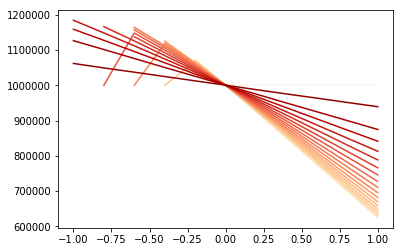

In [4]:
fig1,ax=plt.subplots()
for i in np.arange(len(dic['a_kerr'])):
    plt.plot(dic['d1_krz'][i][np.where(dic['M_kerr'][i]>1e5)],dic['M_kerr'][i][np.where(dic['M_kerr'][i]>1e5)],color=plt.cm.OrRd(i*1.0/21.))


In [5]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
ub=[]
for i in np.arange(len(dic['a_kerr'])):
    print(i)
    if dic['a_kerr'][i][-1]<1.0:
        ub.append(1.1)
        print('spin %f, akerr: %f small'%(dic['a_krz'][i][-1],dic['a_kerr'][i][-1]))
        continue
    else:
        intp=interp1d(dic['d1_krz'][i][np.where(dic['a_kerr'][i]>0.00)], dic['a_kerr'][i][np.where(dic['a_kerr'][i]>0.0)])
        def fun(x):
            if x<=1.0:
                return intp(x)-1.0
            #else: 
            #    return intp(1.0)
        ub.append(fsolve(fun,[0.9]))

0
spin 0.000000, akerr: 0.000000 small
1
spin 0.050000, akerr: 0.089451 small
2
spin 0.100000, akerr: 0.179683 small
3
spin 0.150000, akerr: 0.269277 small
4
spin 0.200000, akerr: 0.358483 small
5
spin 0.250000, akerr: 0.446840 small
6
spin 0.300000, akerr: 0.532866 small
7
spin 0.350000, akerr: 0.616011 small
8
spin 0.400000, akerr: 0.695949 small
9
spin 0.450000, akerr: 0.772302 small
10
spin 0.500000, akerr: 0.843277 small
11
spin 0.550000, akerr: 0.909101 small
12
spin 0.600000, akerr: 0.969046 small
13
14
15
16
17
18
19
20


In [6]:
dic['a_krz'][i][-1]

1.0

In [7]:
ub

[1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 array([ 0.95439326]),
 array([ 0.85585212]),
 array([ 0.75674488]),
 array([ 0.65192433]),
 array([ 0.54008029]),
 array([ 0.41248759]),
 array([ 0.25344696]),
 array([-0.00196705])]

In [8]:
spinl=np.arange(0,1.01,0.05)
lb=[0	,-0.18	,-0.2	,-0.24	,-0.28	,-0.3	,-0.34	,-0.38	,-0.38	,-0.46	,-0.5	,-0.56	,-0.62	,-0.72	,-0.78	,-0.78	,-0.98	,-1	,-1.1	,-1.1	,-1.1
]

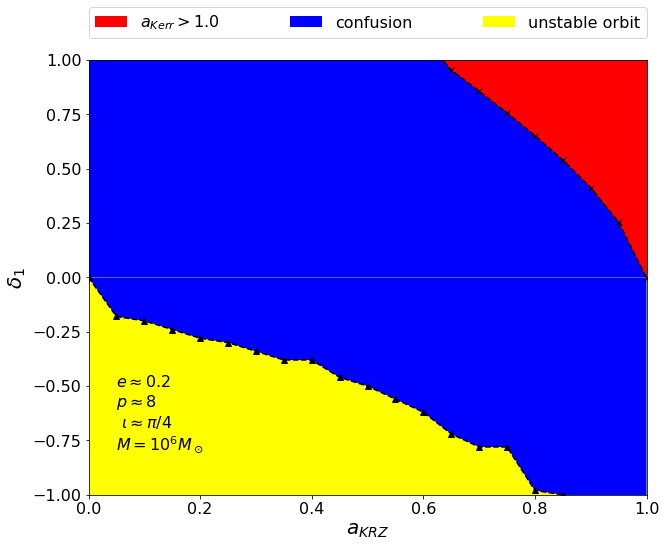

In [13]:
plt.figure(figsize=[10,8])
plt.plot(spinl,ub,'kx--')
plt.plot(spinl,lb,'k^--')
plt.xlim(0.0,1.0)
plt.ylim(-1,1)
plt.fill_between(spinl,np.zeros(21)+1,facecolor='r',label='$a_{Kerr}>1.0$')
plt.fill_between(spinl,ub,facecolor='blue',label='confusion')

plt.fill_between(spinl,np.zeros(21)-1,facecolor='yellow',label='unstable orbit')
plt.fill_between(spinl,lb,facecolor='blue')
plt.legend(fontsize=16, bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=6, mode="expand", borderaxespad=0.)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(0.05,-0.8,'$e\\approx 0.2$\n$p\\approx 8$\n $\iota \\approx \pi/4$\n$M=10^6 M_\odot$',fontsize=16)
plt.xlabel('$a_{KRZ}$',fontsize=20)
plt.ylabel('$\delta_1$',fontsize=20)
plt.savefig('3d_bound.pdf')